In [29]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, LineString
county_dict = {}
index = 0
with open('../county.txt') as fp:
    for cnt, line in enumerate(fp):
        line_data = line.split("\t")
        fips = line_data[2]
        lat = float(line_data[12][1:-1])
        lon = float(line_data[13][1:-2])*-1
        county_dict[index]=(fips, lat, lon)
        index = index+1
county_dict[index] = ("00000", 40.730610, -73.935242)
county_dict[index+1] = ("00001", 39.099724, -94.578331)

ValueError: could not convert string to float: 'Atlanta'

In [20]:
county_dict_df = pd.DataFrame.from_dict(county_dict, orient='index', columns=['id', 'latitude', 'longitude'])
s = gpd.GeoSeries([Point(x,y) for x, y in zip(county_dict_df['longitude'], county_dict_df['latitude'])])
geo_df = gpd.GeoDataFrame(county_dict_df[['id']], geometry=s)
geo_df.crs = {'init': 'epsg:4326'} 
geo_df = geo_df.to_crs({'init': 'epsg:3857'})

In [21]:
final_county_dict = {}
for index, row in geo_df.iterrows():
    curr_id = row["id"]
    x = row["geometry"].y
    y = row["geometry"].x
    final_county_dict[curr_id] = (x, y)

In [28]:
df = pd.read_csv("us-counties.csv")

In [29]:
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
33246,2020-04-04,Sublette,Wyoming,56035.0,1,0
33247,2020-04-04,Sweetwater,Wyoming,56037.0,4,0
33248,2020-04-04,Teton,Wyoming,56039.0,36,0
33249,2020-04-04,Uinta,Wyoming,56041.0,2,0


In [30]:
import datetime
datetime.datetime.strptime("2015-02-24T13:00:00-08:00", "%Y-%B-%dT%H:%M:%S-%H:%M").date()

datetime.date(2010, 5, 24)

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, LineString
df = pd.read_csv("us-counties.csv")

case_dict = {}
death_dict = {}

for i, row in enumerate(df.values):
    time = row[0]
    case = int(row[4])
    death = int(row[5])
    if time in case_dict.keys():
        case_dict[time]=case_dict[time]+case
    else:
        case_dict[time]=case
    if time in death_dict.keys():
        death_dict[time]=death_dict[time]+death
    else:
        death_dict[time]=death

In [13]:
def column(matrix, i):
    return [row[i] for row in matrix]
column(case_dict.items(), 1)

[1,
 1,
 1,
 2,
 3,
 5,
 5,
 5,
 5,
 6,
 7,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 15,
 15,
 15,
 15,
 25,
 25,
 25,
 27,
 30,
 30,
 30,
 43,
 45,
 60,
 60,
 65,
 70,
 88,
 104,
 125,
 161,
 228,
 311,
 428,
 547,
 748,
 1018,
 1263,
 1668,
 2224,
 2898,
 3600,
 4507,
 5905,
 8345,
 12413,
 17996,
 24532,
 33061,
 43499,
 54186,
 68775,
 85615,
 102913,
 123831,
 142178,
 163672,
 187962,
 214760,
 243747,
 276091,
 310807]

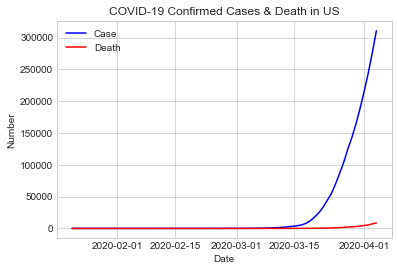

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(date_arr, column(case_dict.items(), 1), "-b", label="Case");
plt.plot(date_arr, column(death_dict.items(), 1), "-r", label="Death");
plt.title("COVID-19 Confirmed Cases & Death in US")
plt.xlabel("Date")
plt.ylabel("Number")
plt.legend(loc="upper left")

In [23]:
import datetime
date = 0
date_arr = []
for i in range(0,len(column(case_dict.items(), 0))):
    date_arr.append(datetime.datetime.strptime(column(case_dict.items(), 0)[i], '%Y-%m-%d'))
date_arr

[datetime.datetime(2020, 1, 21, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0,

In [21]:
column(case_dict.items(), 0)

['2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-

In [118]:
rt = []
##[lat, lon, time, case_no]
for index, row in df.iterrows():   
    if (row["county"]=="New York City"):
        ## replace new york city fips with 00000
        rt.append(["00000", 40.730610, -73.935242, row["date"], int(row["cases"])])
    elif (row["county"]=="Kansas City"):
        ## replace kansas city fips with 00001
        rt.append(["00001", 39.099724, -94.578331, row["date"], int(row["cases"])])
    elif (row["state"]!="Alaska" and row["state"]!="Hawaii" and row["county"]!="Unknown"):
        fips = str(int(row["fips"]))
        if (len(fips)!=5):
            fips = "0"+fips
        lat = final_county_dict[fips][0]
        lon = final_county_dict[fips][1]
        rt.append([fips, lat, lon, row["date"], int(row["cases"])])

In [119]:
county_case_dict = {}
for i in range(0, len(rt)):
    curr_fips = rt[i][0]
    if (curr_fips in county_case_dict.keys()):
        curr_date = rt[i][3]
        curr_no = rt[i][4]
        prev_no = 0
        prev_record = county_case_dict[curr_fips]
        for j in range(0, len(prev_record)):
            prev_no = prev_no+prev_record[j][1]
        day_no = curr_no-prev_no
        if (day_no!=0):
            county_case_dict[curr_fips].append((curr_date, day_no))
    else:
        county_case_dict[curr_fips]=[(rt[i][3],rt[i][4])]

In [120]:
final_rt = []
total_case = 0
for county in county_case_dict.keys():
    lat = round(final_county_dict[county][0])
    lon = round(final_county_dict[county][1])
    record = county_case_dict[county]
    for case in record:
        date = case[0]
        case_no = case[1]
        curr_time = 0
        #print(date)
        mon = int(date.split("-")[1])
        day = int(date.split("-")[2])
        if (mon == 1):
            curr_time = day-21
        elif (mon == 2):
            curr_time = 31+day-21
        elif (mon == 3):
            curr_time = 31+29+day-21 = 54
        elif (mon == 4):
            curr_time = 31+29+31+day-21
        else:
            print("Invalid Data")
        total_case = total_case+case_no
        for i in range(0, case_no):
            final_time = curr_time+((i+1)/(case_no+1))
            final_rt.append([lat, lon*(-1), final_time])

In [121]:
len(final_rt)

304394

In [122]:
rt_str = "{"
for i in range(0, len(final_rt)):
    if (i%100000==0):
        print (i)
    rt_str = rt_str+"{"+str(final_rt[i][0])+","+str(final_rt[i][1])+","+str(final_rt[i][2])+"},"
rt_str = rt_str+"}"

0
100000
200000
300000


In [123]:
f = open("rt.txt", "w")
f.write(rt_str)
f.close()

In [124]:
len(final_rt)

304394

In [125]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [126]:
min(column(final_rt, 0))

2949752

In [127]:
max(column(final_rt, 0))

6248205

In [128]:
min(column(final_rt, 1))

7526239

In [129]:
max(column(final_rt, 1))

13801502

In [130]:
max(column(final_rt, 2))

74.9998373454782

In [131]:
min(column(final_rt, 2))

0.5

In [132]:
f = open("new_data.txt", "w")
for i in range(0, len(final_rt)):
    curr_str = str(final_rt[i][0])+","+str(final_rt[i][1])+","+str(final_rt[i][2])+"\n"
    f.write(curr_str)
f.close()

In [143]:
np.std(column(final_rt, 0))

596345.2568172573

In [146]:
len(final_rt)

304394

In [144]:
2.21*len(final_rt)**((-1)/7)*np.std(column(final_rt, 0))

217041.124316897

In [145]:
(max(column(final_rt, 0))-min(column(final_rt, 0)))/217041.124316897

15.197364141848071

In [148]:
x = column(final_rt, 0)
y = column(final_rt, 1)
z = column(final_rt, 2)

In [154]:
len(final_rt)**(-1/7)*2.21*np.std(column(final_rt, 0))

217041.124316897

In [155]:
len(final_rt)**(-1/7)*2.21*np.std(column(final_rt, 1))

555115.1942688536

In [159]:
len(final_rt)**(-1/7)*2.21*np.std(column(final_rt, 2))

1.8008192497590723

In [160]:
6248205-2949752

3298453

In [166]:
3000/3298453*100000


90.95172797672122

In [167]:
3298453/100000

32.98453